In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [355]:
day_data  = pd.read_csv('day.csv')

In [356]:
day_data.shape

(730, 16)

In [357]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [358]:
day_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [359]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [360]:
day_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [361]:
day_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [362]:
day_data.loc[day_data['season'] == 1, 'season'] = 'spring'
day_data.loc[day_data['season'] == 2, 'season'] = 'summer'
day_data.loc[day_data['season'] == 3, 'season'] = 'fall'
day_data.loc[day_data['season'] == 4, 'season'] = 'winter'

In [363]:
# Also for weathersit

day_data.loc[day_data['weathersit']==1, 'weathersit'] = 'clear'
day_data.loc[day_data['weathersit']==2, 'weathersit'] = 'mist'
day_data.loc[day_data['weathersit']==3, 'weathersit'] = 'light_snow'
day_data.loc[day_data['weathersit']==4, 'weathersit'] = 'heavy_rain'

In [364]:
day_data.season.astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [365]:
day_data.weathersit.astype('category').value_counts()

clear         463
mist          246
light_snow     21
Name: weathersit, dtype: int64

In [366]:
# Operate on month 

def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

day_data[['mnth']] = day_data[['mnth']].apply(object_map)
day_data.mnth.astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [367]:
day_data.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [368]:
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

day_data[['weekday']] = day_data[['weekday']].apply(str_map)

In [369]:
day_data.weekday.astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

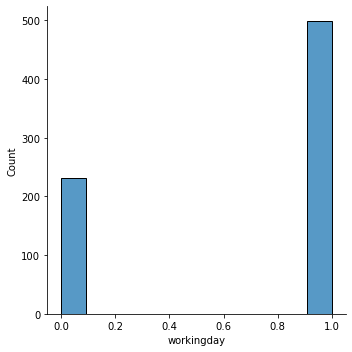

In [370]:
# Visualization 
# Simple dist plot

sns.displot(day_data.workingday)

Conclusion: Get more bookings on weekends 

C:\Users\avdhe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

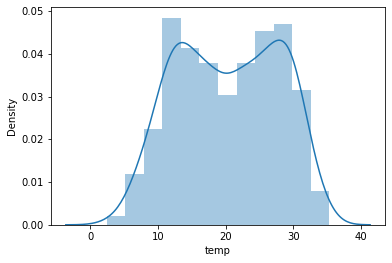

In [371]:
sns.distplot(day_data.temp)

In [372]:
day_data.dteday = day_data.dteday.astype('datetime64')

In [373]:
data_categ = day_data.select_dtypes('object')
data_categ

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,mist
1,spring,Jan,Tues,mist
2,spring,Jan,Wed,clear
3,spring,Jan,Thurs,clear
4,spring,Jan,Fri,clear
...,...,...,...,...
725,spring,Dec,Sat,mist
726,spring,Dec,Sun,mist
727,spring,Dec,Mon,mist
728,spring,Dec,Tues,clear


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

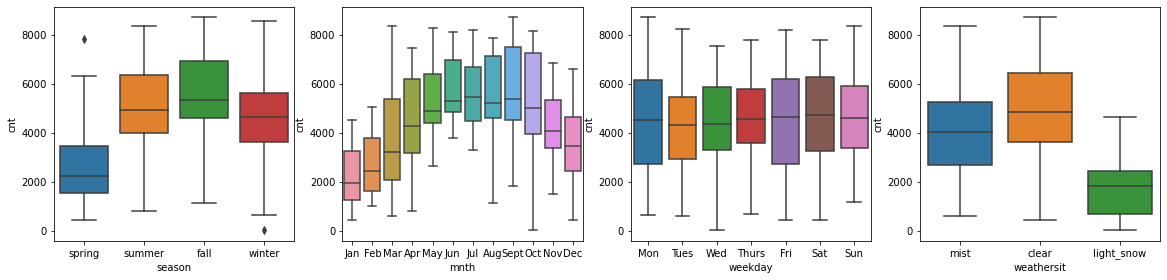

In [374]:
plt.figure(figsize=(25,25))
plt.subplot(5,5,1)
sns.boxplot(x='season', y='cnt', data=day_data)
plt.subplot(5,5,2)
sns.boxplot(x='mnth', y='cnt', data=day_data)
plt.subplot(5,5,3)
sns.boxplot(x='weekday', y='cnt', data=day_data)
plt.subplot(5,5,4)
sns.boxplot(x='weathersit', y='cnt', data=day_data)

In [375]:
# Visualizing numerical vars
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [376]:
data_numeric = day_data[['temp', 'atemp', 'windspeed', 'casual', 'registered', 'cnt']]
data_numeric

,temp,atemp,windspeed,casual,registered,cnt
0,14.110847,18.18125,10.749882,331,654,985
1,14.902598,17.68695,16.652113,131,670,801
2,8.050924,9.47025,16.636703,120,1229,1349
3,8.200000,10.60610,10.739832,108,1454,1562
4,9.305237,11.46350,12.522300,82,1518,1600
...,...,...,...,...,...,...
725,10.420847,11.33210,23.458911,247,1867,2114
726,10.386653,12.75230,10.416557,644,2451,3095
727,10.386653,12.12000,8.333661,159,1182,1341
728,10.489153,11.58500,23.500518,364,1432,1796


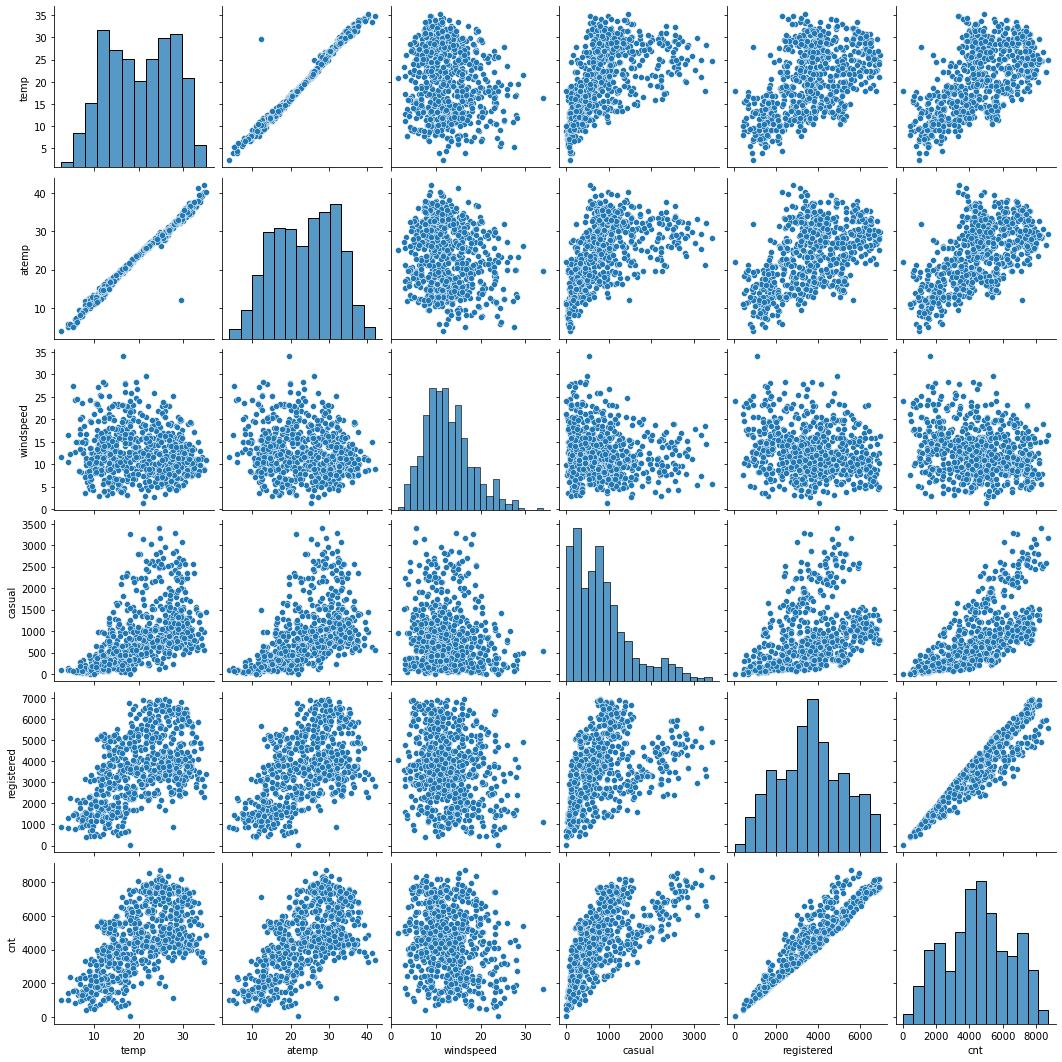

In [377]:
sns.pairplot(data_numeric)

In [378]:
# correlation 

cor = data_numeric.corr()

<AxesSubplot:>

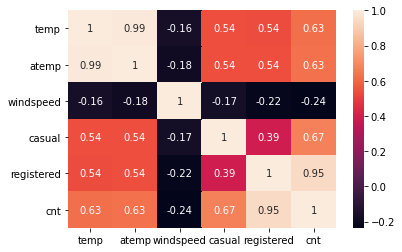

In [379]:
sns.heatmap(cor, annot=True)

temp and atemp are highly related, lets drop atemp to remove correlation.

In [380]:
day_data.drop('atemp',axis=1, inplace=True)

In [381]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(4)
memory usage: 85.7+ 

## Data Prep

Create dummy vars for catergorical values 

In [382]:
data_dummies = pd.get_dummies(data=data_categ, drop_first=True)

In [383]:
cols_to_del = ['season', 'mnth', 'weekday', 'weathersit', 'dteday', 'instant']
day_data.drop(cols_to_del, inplace=True, axis=1)

In [384]:
day_data = pd.concat([day_data, data_dummies], axis=1)

In [385]:
day_data.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_light_snow,weathersit_mist
0,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


## Model Building and Evaluation

In [386]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(day_data, train_size=0.7, test_size=0.3, random_state=42)

In [387]:
print(df_train.shape)
print(df_test.shape)

(510, 31)
(219, 31)


In [388]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
vars_to_scale = ['temp', 'hum','windspeed','casual','registered','cnt']
day_data[vars_to_scale] = scaler.fit_transform(day_data[vars_to_scale])

In [389]:
day_data.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_light_snow,weathersit_mist
0,0,0,0,0.355170,0.828620,0.284606,0.096538,0.091539,0.110792,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0.379232,0.715771,0.466215,0.037852,0.093849,0.089623,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,0.171000,0.449638,0.465740,0.034624,0.174560,0.152669,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0.175530,0.607131,0.284297,0.031103,0.207046,0.177174,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.209120,0.449313,0.339143,0.023474,0.216286,0.181546,1,...,0,0,0,0,0,0,0,0,0,0


In [390]:
day_data.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_light_snow,weathersit_mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,0.543852,0.645400,0.346568,0.248606,0.525376,0.516108,0.246575,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.143836,0.028767,0.336986
std,0.500343,0.167266,0.465405,0.228140,0.146402,0.159873,0.201432,0.225203,0.222735,0.431313,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.351164,0.167266,0.473004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346084,0.534704,0.232045,0.092210,0.358396,0.362143,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.548307,0.643959,0.326928,0.209800,0.526206,0.520766,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743261,0.750535,0.434629,0.321156,0.687735,0.683847,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


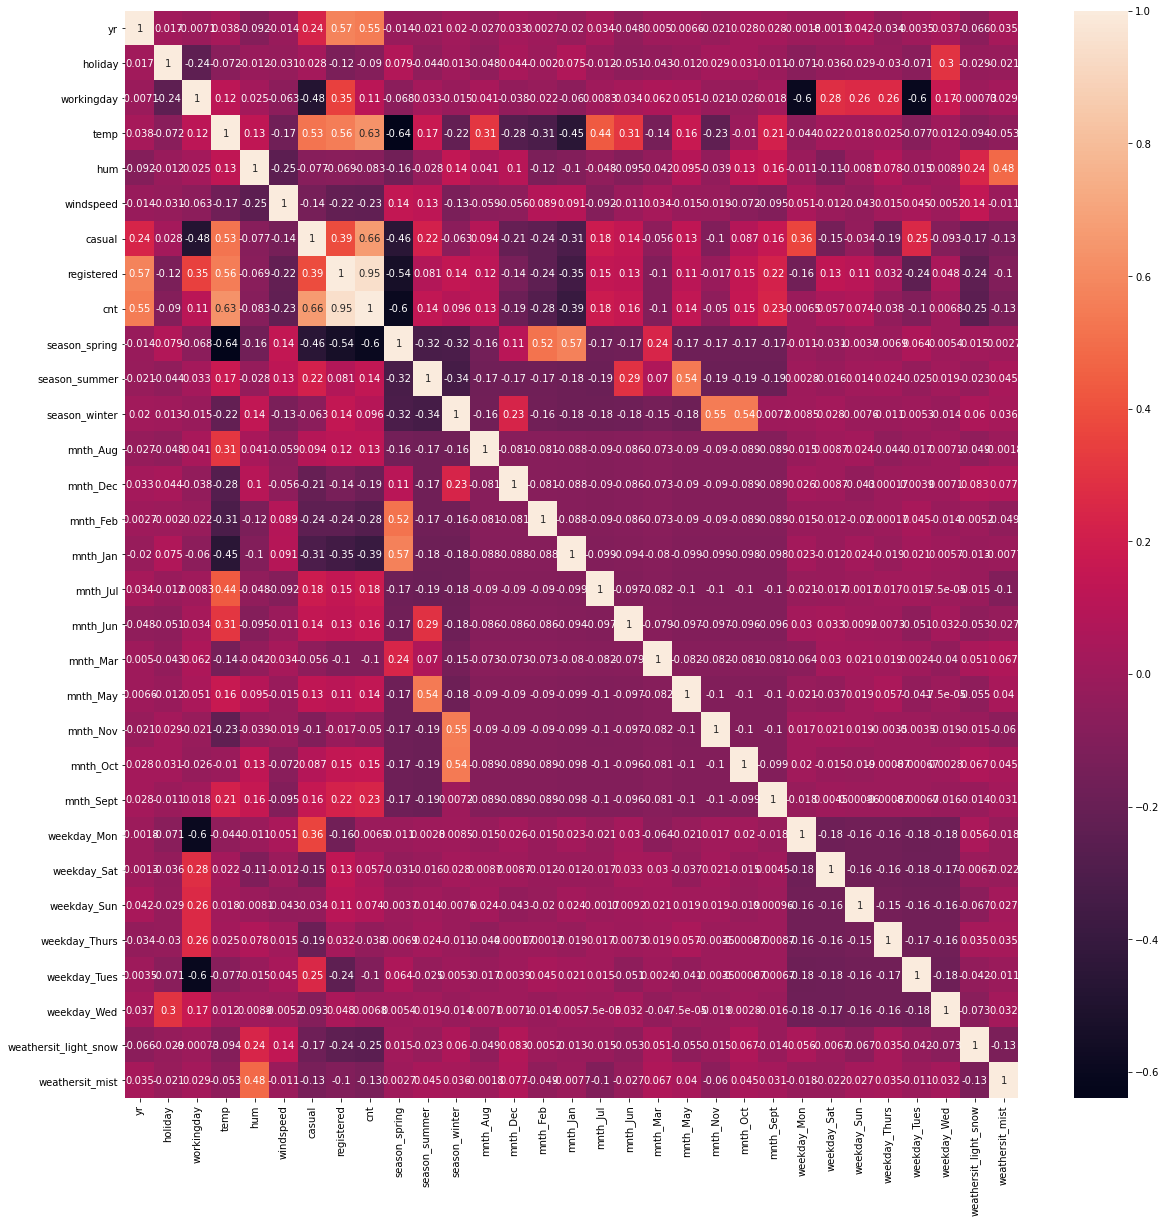

In [391]:
# check the correlation between numeric vars 
plt.figure(figsize=(20,20))
sns.heatmap(data=df_train.corr(), annot=True)
plt.show()

target var 'cnt' has a good corr with casual, registerd and temp

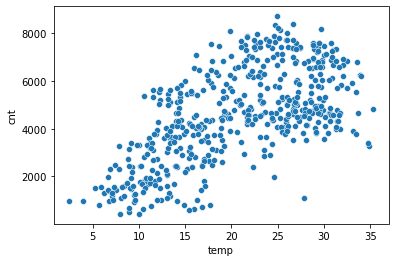

In [392]:
sns.scatterplot(data=df_train, x='temp', y='cnt')
plt.show()

In [393]:
Y_train = df_train.pop('cnt')
X_train = df_train.drop(['casual', 'registered'], axis=1)
print(X_train.shape)
print(Y_train.shape)

(510, 28)
(510,)


In [394]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.]])

### Building models with all the feature 

In [398]:
import statsmodels.api as sm
lr_X = sm.add_constant(X_train)
lr = sm.OLS(Y_train, lr_X).fit()
lr.params

const                    2151.624956
yr                       1949.651409
holiday                   131.457659
workingday                777.045972
temp                      113.033004
hum                       -13.746634
windspeed                 -37.420789
season_spring           -1225.142216
season_summer             101.771908
season_winter             635.598243
mnth_Aug                 -129.390525
mnth_Dec                 -304.986071
mnth_Feb                  149.045819
mnth_Jan                   14.452360
mnth_Jul                 -384.443871
mnth_Jun                  -38.475987
mnth_Mar                  468.581264
mnth_May                  237.641655
mnth_Nov                 -412.527894
mnth_Oct                  320.779176
mnth_Sept                 593.085511
weekday_Mon               817.655655
weekday_Sat                25.768465
weekday_Sun                82.990333
weekday_Thurs            -155.927130
weekday_Tues              425.465671
weekday_Wed               -74.660033
w

In [401]:
model = LinearRegression()

model.fit(X_train, Y_train)

print(model.coef_)
print(model.intercept_)
lr.summary()

[ 1949.65140909  -406.44858013   239.13973271   113.0330041
   -13.74663445   -37.42078934 -1225.142216     101.7719083
   635.59824327  -129.39052536  -304.98607119   149.04581921
    14.45235986  -384.44387063   -38.47598726   468.58126356
   237.64165518  -412.52789395   320.77917644   593.08551125
   279.74941552    25.76846466    82.99033284  -155.92713007
  -112.4405681    -74.66003254 -1910.37247827  -489.46299564]
2689.5311956142255


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.11
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.13e-177
Time:                        04:10:39   Log-Likelihood:                -4104.1
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     482   BIC:                             8383.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2151.6250    342.605      6.280      0.000    1478.442    2824.808
yr                     1949.6514     70.866     27.512      0.000    1810.406    2088.897
holiday                 131.4577    209.200      0.628      0.530    -279.598     542.514
workingday              777.0460    114.647      6.778      0.000     551.777    1002.315
temp                    113.0330     12.239      9.236      0.000      88.985     137.081
hum                     -13.7466      3.525     -3.900      0.000     -20.672      -6.821
windspeed               -37.4208      7.763     -4.821      0.000     -52.674     -22.168
season_spring         -1225.1422    270.113     -4.536      0.000   -1755.888    -694.397
season_summer           101.7719    225.076      0.452      0.651    -340.479     544.023
season_winter           635.5982    229.801      2.766      0.006     184.063    1087.133
mnth_Aug               -129.3905    296.494     -0.436      0.663    -711.971     453.190
mnth_Dec               -304.9861    302.420     -1.008      0.314    -899.210     289.238
mnth_Feb                149.0458    306.784      0.486      0.627    -453.754     751.845
mnth_Jan                 14.4524    312.242      0.046      0.963    -599.072     627.976
mnth_Jul               -384.4439    299.584     -1.283      0.200    -973.095     204.207
mnth_Jun                -38.4760    210.416     -0.183      0.855    -451.923     374.971
mnth_Mar                468.5813    240.453      1.949      0.052      -3.884     941.046
mnth_May                237.6417    176.889      1.343      0.180    -109.927     585.210
mnth_Nov               -412.5279    320.166     -1.288      0.198   -1041.622     216.566
mnth_Oct                320.7792    314.619      1.020      0.308    -297.416     938.974
mnth_Sept               593.0855    275.570      2.152      0.032      51.619    1134.552
weekday_Mon             817.6557    123.089      6.643      0.000     575.798    1059.513
weekday_Sat              25.7685    130.764      0.197      0.844    -231.170     282.707
weekday_Sun              82.9903    134.830      0.616      0.539    -181.937     347.918
weekday_Thurs          -155.9271    133.425     -1.169      0.243    -418.094     106.240
weekday_Tues            425.4657    126.258      3.370      0.001     177.381     673.550
weekday_Wed             -74.6600    134.581     -0.555      0.579    -339.098     189.778
weathersit_light_snow -1910.3725    235.731     -8.104      0.000   -2373.559   -1447.186
weathersit_mist        -489.4630     92.093     -5.315      0.000    -670.415    -308.511
==============================================================================
Omnibus:                       82.650   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarqu

In [400]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.11
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.13e-177
Time:                        04:06:28   Log-Likelihood:                -4104.1
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     482   BIC:                             8383.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2151.6250    342.605      6.280      0.000    1478.442    2824.808
yr                     1949.6514     70.866     27.512      0.000    1810.406    2088.897
holiday                 131.4577    209.200      0.628      0.530    -279.598     542.514
workingday              777.0460    114.647      6.778      0.000     551.777    1002.315
temp                    113.0330     12.239      9.236      0.000      88.985     137.081
hum                     -13.7466      3.525     -3.900      0.000     -20.672      -6.821
windspeed               -37.4208      7.763     -4.821      0.000     -52.674     -22.168
season_spring         -1225.1422    270.113     -4.536      0.000   -1755.888    -694.397
season_summer           101.7719    225.076      0.452      0.651    -340.479     544.023
season_winter           635.5982    229.801      2.766      0.006     184.063    1087.133
mnth_Aug               -129.3905    296.494     -0.436      0.663    -711.971     453.190
mnth_Dec               -304.9861    302.420     -1.008      0.314    -899.210     289.238
mnth_Feb                149.0458    306.784      0.486      0.627    -453.754     751.845
mnth_Jan                 14.4524    312.242      0.046      0.963    -599.072     627.976
mnth_Jul               -384.4439    299.584     -1.283      0.200    -973.095     204.207
mnth_Jun                -38.4760    210.416     -0.183      0.855    -451.923     374.971
mnth_Mar                468.5813    240.453      1.949      0.052      -3.884     941.046
mnth_May                237.6417    176.889      1.343      0.180    -109.927     585.210
mnth_Nov               -412.5279    320.166     -1.288      0.198   -1041.622     216.566
mnth_Oct                320.7792    314.619      1.020      0.308    -297.416     938.974
mnth_Sept               593.0855    275.570      2.152      0.032      51.619    1134.552
weekday_Mon             817.6557    123.089      6.643      0.000     575.798    1059.513
weekday_Sat              25.7685    130.764      0.197      0.844    -231.170     282.707
weekday_Sun              82.9903    134.830      0.616      0.539    -181.937     347.918
weekday_Thurs          -155.9271    133.425     -1.169      0.243    -418.094     106.240
weekday_Tues            425.4657    126.258      3.370      0.001     177.381     673.550
weekday_Wed             -74.6600    134.581     -0.555      0.579    -339.098     189.778
weathersit_light_snow -1910.3725    235.731     -8.104      0.000   -2373.559   -1447.186
weathersit_mist        -489.4630     92.093     -5.315      0.000    -670.415    -308.511
==============================================================================
Omnibus:                       82.650   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarqu

### R2 of around 84 % 